<a href="https://colab.research.google.com/github/ABELKHA/SALES-DATA-ANALYSIS/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
make me analysis

Here is all the data you need:
"sales_data_sample.csv"

## Data loading

### Subtask:
Load the data from "sales_data_sample.csv" into a dataframe.


**Reasoning**:
Import pandas and load the data from the CSV file into a dataframe, then display the first 5 rows and the dataframe's info to verify the data is loaded correctly.



In [1]:
import pandas as pd

df = pd.read_csv('sales_data_sample.csv', encoding='latin-1')
display(df.head())
display(df.info())

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


None

## Data cleaning

### Subtask:
Clean the data, including handling missing values and duplicates if necessary.


**Reasoning**:
Identify columns with missing values and drop columns with a small number of missing values or those not critical for analysis as per the instructions. Fill missing values in critical columns with 'Unknown'. Check for and remove duplicate rows. Finally, display the info of the cleaned dataframe to confirm the changes.



In [2]:
# Identify columns with missing values
print("Columns with missing values before cleaning:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Drop columns with a small number of missing values or those not critical
# ADDRESSLINE2 has a large number of missing values and is not critical for analysis.
# STATE, POSTALCODE, and TERRITORY have missing values that might impact analysis,
# but given the nature of the data and potential analyses (e.g., geographical),
# filling with 'Unknown' is a reasonable strategy to retain rows.
df = df.drop(columns=['ADDRESSLINE2'])

# Fill missing values in critical columns with 'Unknown'
# Justification: 'Unknown' is used as a placeholder to indicate that the original
# value was missing. This approach is chosen over imputation with mode or other
# methods because these columns are categorical or geographical identifiers
# where a calculated value might be misleading. 'Unknown' preserves the fact
# that the original information was not available.
for col in ['STATE', 'POSTALCODE', 'TERRITORY']:
    df[col] = df[col].fillna('Unknown')

# Check for and remove duplicate rows
print("\nNumber of duplicate rows before cleaning:", df.duplicated().sum())
df = df.drop_duplicates()
print("Number of duplicate rows after cleaning:", df.duplicated().sum())

# Display the info of the dataframe again to confirm changes
print("\nInfo of the dataframe after cleaning:")
display(df.info())

Columns with missing values before cleaning:
ADDRESSLINE2    2521
STATE           1486
POSTALCODE        76
TERRITORY       1074
dtype: int64

Number of duplicate rows before cleaning: 0
Number of duplicate rows after cleaning: 0

Info of the dataframe after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP    

None

## Data exploration

### Subtask:
Explore the data to understand its structure, content, and basic statistics. Identify key columns for analysis.


**Reasoning**:
Display the column names and their data types to understand the structure of the DataFrame, generate descriptive statistics for numerical columns, and use value_counts on relevant categorical columns.



In [3]:
# Display column names and data types
print("Column names and data types:")
display(df.info())

# Generate descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
display(df.describe())

# Use value_counts on relevant categorical columns
print("\nValue counts for relevant categorical columns:")
categorical_cols = ['PRODUCTLINE', 'DEALSIZE', 'CUSTOMERNAME', 'COUNTRY', 'TERRITORY']
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    display(df[col].value_counts())

Column names and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  CITY         

None


Descriptive statistics for numerical columns:


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000



Value counts for relevant categorical columns:

Value counts for PRODUCTLINE:


,count
PRODUCTLINE,
Classic Cars,967
Vintage Cars,607
Motorcycles,331
Planes,306
Trucks and Buses,301
Ships,234
Trains,77



Value counts for DEALSIZE:


,count
DEALSIZE,
Medium,1384
Small,1282
Large,157



Value counts for CUSTOMERNAME:


,count
CUSTOMERNAME,
Euro Shopping Channel,259
Mini Gifts Distributors Ltd.,180
"Australian Collectors, Co.",55
La Rochelle Gifts,53
"AV Stores, Co.",51
...,...
Microscale Inc.,10
Auto-Moto Classics Inc.,8
Royale Belge,8



Value counts for COUNTRY:


,count
COUNTRY,
USA,1004
Spain,342
France,314
Australia,185
UK,144
Italy,113
Finland,92
Norway,85
Singapore,79



Value counts for TERRITORY:


,count
TERRITORY,
EMEA,1407
Unknown,1074
APAC,221
Japan,121


## Data analysis

### Subtask:
Perform analysis on the sales data, which could include calculating total sales, identifying top-selling products or regions, analyzing sales trends over time, etc.


**Reasoning**:
The subtask requires performing various sales analysis steps, including calculating total sales, identifying top products and countries, and analyzing sales trends over time. These steps can be performed using pandas operations on the existing dataframe.



In [4]:
# 1. Calculate the total sales across all orders
total_sales = df['SALES'].sum()
print(f"Total Sales Across All Orders: ${total_sales:,.2f}")

# 2. Identify the top 10 best-selling product lines
top_products = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Best-Selling Product Lines:")
display(top_products)

# 3. Determine the top 10 countries by total sales
top_countries = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Countries by Total Sales:")
display(top_countries)

# 4. Analyze sales trends over time
# Ensure 'ORDERDATE' is in datetime format
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Group by year and month
sales_over_time = df.groupby([df['ORDERDATE'].dt.year, df['ORDERDATE'].dt.month])['SALES'].sum()
sales_over_time.index.names = ['Year', 'Month']
print("\nSales Trends Over Time (Year and Month):")
display(sales_over_time)

Total Sales Across All Orders: $10,032,628.85

Top 10 Best-Selling Product Lines:


,SALES
PRODUCTLINE,
Classic Cars,3919615.66
Vintage Cars,1903150.84
Motorcycles,1166388.34
Trucks and Buses,1127789.84
Planes,975003.57
Ships,714437.13
Trains,226243.47



Top 10 Countries by Total Sales:


,SALES
COUNTRY,
USA,3627982.83
Spain,1215686.92
France,1110916.52
Australia,630623.10
UK,478880.46
Italy,374674.31
Finland,329581.91
Norway,307463.70
Singapore,288488.41



Sales Trends Over Time (Year and Month):


Year  Month
2003  1         129753.60
      2         140836.19
      3         174504.90
      4         201609.55
      5         192673.11
      6         168082.56
      7         187731.88
      8         197809.30
      9         263973.36
      10        568290.97
      11       1029837.66
      12        261876.46
2004  1         316577.42
      2         311419.53
      3         205733.73
      4         206148.12
      5         273438.39
      6         286674.22
      7         327144.09
      8         461501.27
      9         320750.91
      10        552924.25
      11       1089048.01
      12        372802.66
2005  1         339543.42
      2         358186.18
      3         374262.76
      4         261633.29
      5         457861.06
Name: SALES, dtype: float64

## Data visualization

### Subtask:
Create visualizations to represent the findings from the data analysis. This could include charts showing sales trends, top products, regional sales comparisons, etc.


**Reasoning**:
Generate the visualizations as requested in the subtask instructions using the results from the previous analysis step.



<ipython-input-5-ed1a55c8185f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')


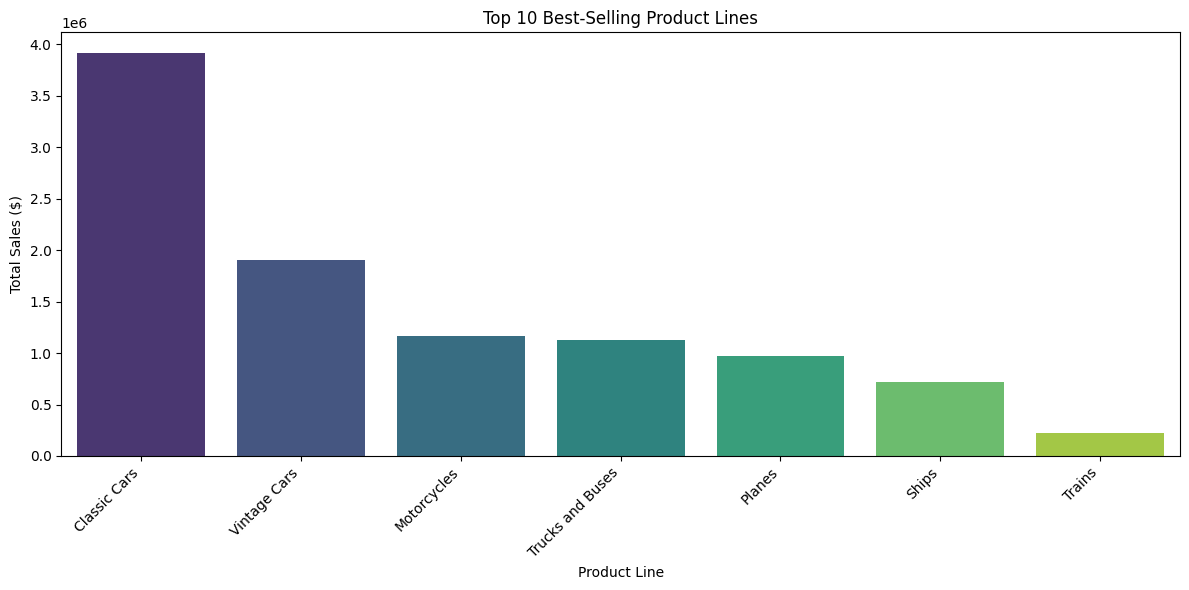

<ipython-input-5-ed1a55c8185f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


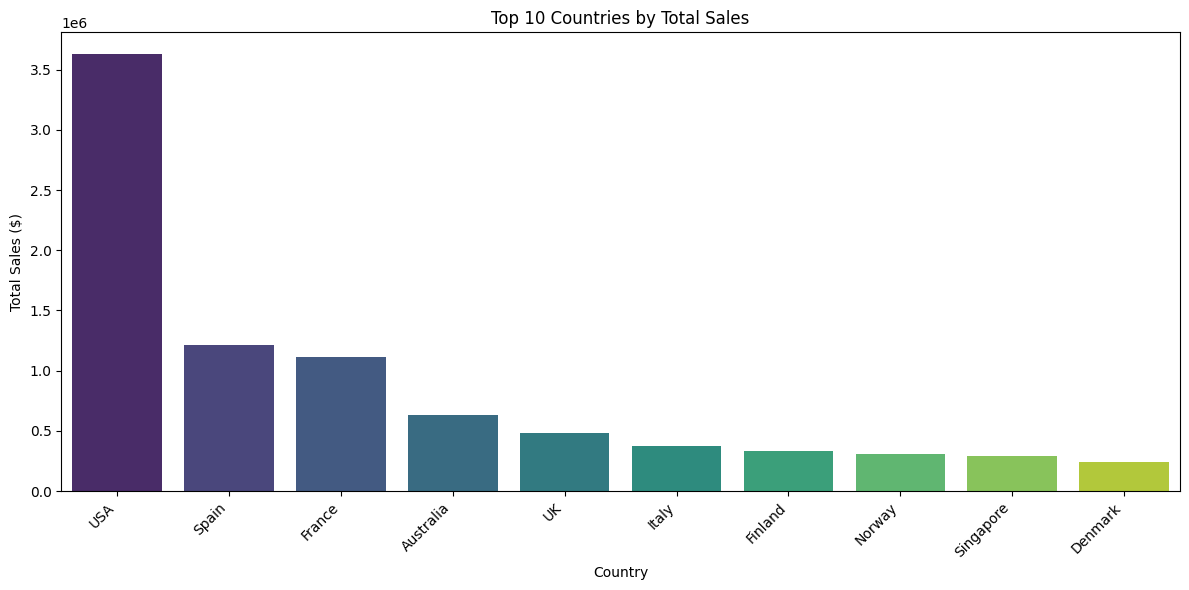

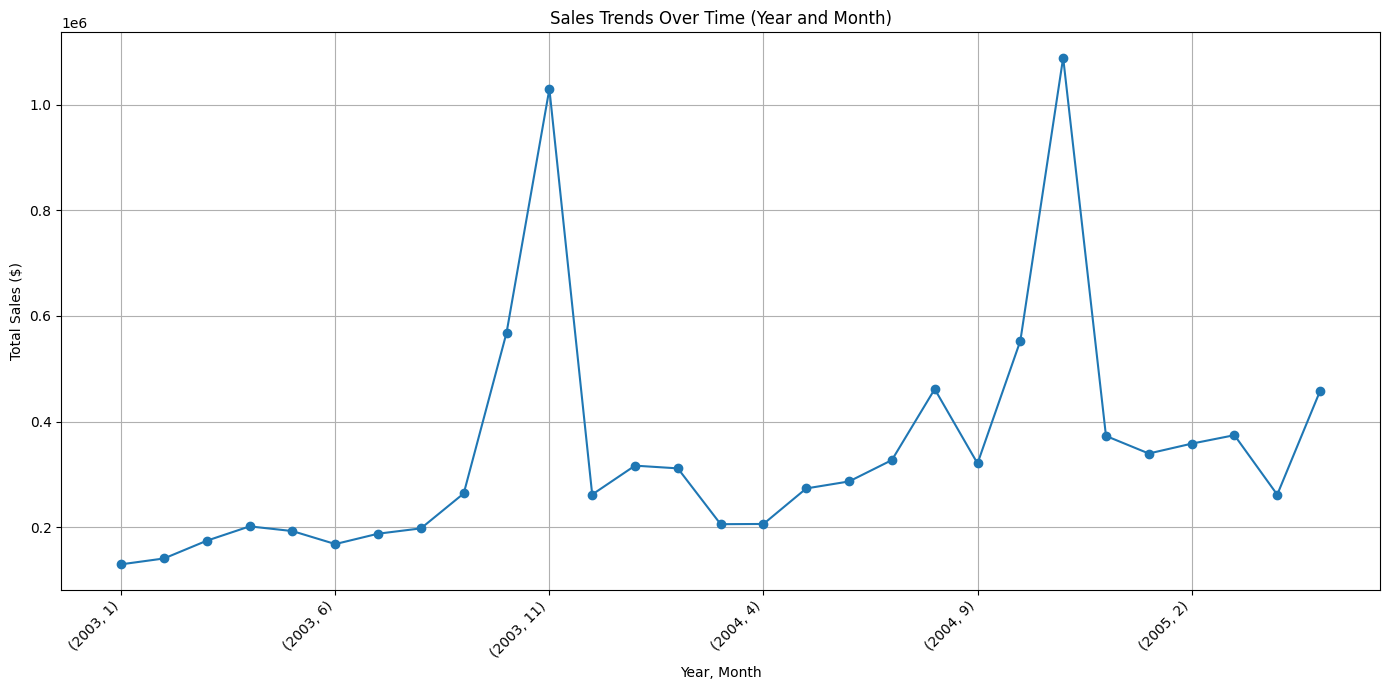

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bar chart for top 10 best-selling product lines
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')
plt.title('Top 10 Best-Selling Product Lines')
plt.xlabel('Product Line')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Bar chart for top 10 countries by total sales
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Line chart for sales trends over time
plt.figure(figsize=(14, 7))
sales_over_time.plot(kind='line', marker='o')
plt.title('Sales Trends Over Time (Year and Month)')
plt.xlabel('Year, Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The total sales across all orders amounted to \$10,032,628.85.
*   "Classic Cars" and "Vintage Cars" were the top two best-selling product lines.
*   The USA was the leading country in terms of total sales, followed by Spain and France.
*   Sales trends over time showed peaks in November for both 2003 and 2004.

### Insights or Next Steps

*   Investigate the reasons behind the significant sales peaks in November to understand seasonal trends or specific campaigns that contributed to these results.
*   Analyze the performance of individual products within the top-selling product lines ("Classic Cars" and "Vintage Cars") to identify specific high-performing items.
